# Indicators of Anxiety and Depression Based on Reported Frequency of Symptoms

In [2]:
#import libraries

import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [3]:
#load dataset

df = pd.read_csv('AnxietyData.csv', parse_dates=['Time Period Start Date', 'Time Period End Date'])

In [4]:
#display data

df.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,23.5,22.7,24.3,22.7 - 24.3,NaN
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,25.7,24.1,27.3,24.1 - 27.3,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,24.8,23.3,26.2,23.3 - 26.2,NaN
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,23.2,21.5,25.0,21.5 - 25.0,NaN


In [5]:
#check for missing values

df.isnull().sum()

Indicator                    0
Group                        0
State                        0
Subgroup                     0
Phase                        0
Time Period                  0
Time Period Label            0
Time Period Start Date       0
Time Period End Date         0
Value                      297
Low CI                     297
High CI                    297
Confidence Interval        297
Quartile Range            2862
dtype: int64

In [17]:
#groups that have missing values in the Value column

filtered_df['Group'].unique()

array(['National Estimate', 'By Age', 'By Sex',
       'By Race/Hispanic ethnicity', 'By Education',
       'By Disability status'], dtype=object)

In [16]:
#check missing values in the Value column

filtered_df = df[df['Value'].isna()]

#display dataframe

filtered_df.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
2520,Symptoms of Depressive Disorder,National Estimate,United States,United States,-1,1,"July 22 - Aug 18, 2020",2020-07-22,2020-08-18,NaN,NaN,NaN,NaN,NaN
2521,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,-1,1,"July 22 - Aug 18, 2020",2020-07-22,2020-08-18,NaN,NaN,NaN,NaN,NaN
2522,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,-1,1,"July 22 - Aug 18, 2020",2020-07-22,2020-08-18,NaN,NaN,NaN,NaN,NaN
2523,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,-1,1,"July 22 - Aug 18, 2020",2020-07-22,2020-08-18,NaN,NaN,NaN,NaN,NaN
2524,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,-1,1,"July 22 - Aug 18, 2020",2020-07-22,2020-08-18,NaN,NaN,NaN,NaN,NaN


In [20]:
#create function that takes a value from the Group column 
#returns the count of NA

def check_na_count(group):
    groupdf = df[df['Group'] == group]
    length_of_na = len(groupdf[groupdf['Value'].isna()])

    length_of_df = len(groupdf)

    na_as_percentage = round((length_of_na/length_of_df),2)

    outputstring = f"In {group} out of {length_of_df} values, there are {length_of_na} missing values. {na_as_percentage}% missing" 

    return outputstring

In [23]:
check_na_count('National Estimate')

##in the original EDA notebook, I ran a cell for each group. 
##to make this cleaner, I want to create a loop 
##that loops through each group and outputs its own f-string 

##it was determined that the missing values were not significant enough

'In National Estimate out of 138 values, there are 15 missing values. 0.11% missing'

In [25]:
df['Phase'].unique()

array(['1', '-1', '2', '3 (Oct 28 � Dec 21)', '3 (Jan 6 � Mar 29)', '3.1',
       '3.2', '3.3'], dtype=object)

In [26]:
#create a new column with newly assigned Phase values (call it Phases)

#create a list of conditions
conditions = [ 
    (df['Time Period Start Date'] >= '2020-04-23') & (df['Time Period End Date'] <='2020-07-21'), #1. Phase 1   04/23/2020 - 07/21/2020
    ((df['Time Period Start Date'] >= '2020-08-19') & (df['Time Period End Date'] <='2020-10-26')), #2. Phase 2   08/19/2020 - 10/26/2020
    ((df['Time Period Start Date'] >= '2020-10-28') & (df['Time Period End Date'] <='2020-12-21')), #3. Phase 3   10/28/2020 - 12/21/2020
    ((df['Time Period Start Date'] >= '2021-01-06') & (df['Time Period End Date'] <= '2021-03-29')), #4. Phase 3 (con't) 01/06/2021 - 03/29/2021   
    ((df['Time Period Start Date'] >= '2021-04-14') & (df['Time Period End Date'] <='2021-07-05')), #5. Phase 3.1 04/14/2021 - 07/05/2021
    ((df['Time Period Start Date'] >= '2021-07-21') & (df['Time Period End Date'] <='2021-10-11')), #6. Phase 3.2 07/21/2021 - 10/11/2021
    ((df['Time Period Start Date'] >= '2021-12-01') & (df['Time Period End Date'] <='2022-02-07'))  #7 Phase 3.3 Phase 3.3 12/01/2021 - 02/07/2022
    
    ]
#create a list of the values we want to assign for each condition
values = ['Phase 1','Phase 2','Phase 3','Phase 4', 'Phase 5','Phase 6', 'Phase 7']

#create a new column and use np.select to assign values to it using our lists as arguments
df['Phases'] = np.select(conditions, values)

#display updated dataframe
df.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range,Phases
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,23.5,22.7,24.3,22.7 - 24.3,NaN,Phase 1
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,32.7,30.2,35.2,30.2 - 35.2,NaN,Phase 1
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,25.7,24.1,27.3,24.1 - 27.3,NaN,Phase 1
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,24.8,23.3,26.2,23.3 - 26.2,NaN,Phase 1
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,23.2,21.5,25.0,21.5 - 25.0,NaN,Phase 1


In [27]:
df['Phases'].unique()

array(['Phase 1', '0', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5',
       'Phase 6', 'Phase 7'], dtype=object)

In [29]:
#exploring what element '0' means in Phases column

zero_phase_value = df[df['Phases'] == '0']

In [30]:
zero_phase_value['Time Period Start Date'].unique()

#these dates correspond to Break periods

array(['2020-07-22T00:00:00.000000000', '2020-12-22T00:00:00.000000000',
       '2021-03-30T00:00:00.000000000', '2021-07-06T00:00:00.000000000',
       '2021-10-12T00:00:00.000000000'], dtype='datetime64[ns]')

In [31]:
zero_phase_value['Time Period End Date'].unique()

#these dates correspond to Break periods

array(['2020-08-18T00:00:00.000000000', '2021-01-05T00:00:00.000000000',
       '2021-04-13T00:00:00.000000000', '2021-07-20T00:00:00.000000000',
       '2021-11-30T00:00:00.000000000'], dtype='datetime64[ns]')

In [32]:
#keep the rows in which surveys were conducted

#removing unwanted rows by filtering
df = df[df['Phases'] != '0']

#display updated dataframe
df.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range,Phases
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,23.5,22.7,24.3,22.7 - 24.3,NaN,Phase 1
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,32.7,30.2,35.2,30.2 - 35.2,NaN,Phase 1
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,25.7,24.1,27.3,24.1 - 27.3,NaN,Phase 1
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,24.8,23.3,26.2,23.3 - 26.2,NaN,Phase 1
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,23.2,21.5,25.0,21.5 - 25.0,NaN,Phase 1


In [36]:
#remove rows that are National Estimates

df = df[df['Group'] != 'National Estimate']

#display df
df.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range,Phases
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,32.7,30.2,35.2,30.2 - 35.2,NaN,Phase 1
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,25.7,24.1,27.3,24.1 - 27.3,NaN,Phase 1
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,24.8,23.3,26.2,23.3 - 26.2,NaN,Phase 1
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,23.2,21.5,25.0,21.5 - 25.0,NaN,Phase 1
5,Symptoms of Depressive Disorder,By Age,United States,60 - 69 years,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,18.4,17.0,19.7,17.0 - 19.7,NaN,Phase 1


In [37]:
#create a new df with relevant columns
clean_df = df[['Indicator','State','Group', 'Subgroup','Phases', 'Time Period Label', 'Value']]

#display new df
clean_df

,Indicator,State,Group,Subgroup,Phases,Time Period Label,Value
1,Symptoms of Depressive Disorder,United States,By Age,18 - 29 years,Phase 1,"Apr 23 - May 5, 2020",32.7
2,Symptoms of Depressive Disorder,United States,By Age,30 - 39 years,Phase 1,"Apr 23 - May 5, 2020",25.7
3,Symptoms of Depressive Disorder,United States,By Age,40 - 49 years,Phase 1,"Apr 23 - May 5, 2020",24.8
4,Symptoms of Depressive Disorder,United States,By Age,50 - 59 years,Phase 1,"Apr 23 - May 5, 2020",23.2
5,Symptoms of Depressive Disorder,United States,By Age,60 - 69 years,Phase 1,"Apr 23 - May 5, 2020",18.4
...,...,...,...,...,...,...,...
9130,Symptoms of Anxiety Disorder or Depressive Dis...,Virginia,By State,Virginia,Phase 7,"Dec 29, 2021 - Jan 10, 2022",35.4
9131,Symptoms of Anxiety Disorder or Depressive Dis...,Washington,By State,Washington,Phase 7,"Dec 29, 2021 - Jan 10, 2022",32.7
9132,Symptoms of Anxiety Disorder or Depressive Dis...,West Virginia,By State,West Virginia,Phase 7,"Dec 29, 2021 - Jan 10, 2022",34.6
9133,Symptoms of Anxiety Disorder or Depressive Dis...,Wisconsin,By State,Wisconsin,Phase 7,"Dec 29, 2021 - Jan 10, 2022",25.5


In [38]:
#create a df that looks at United States only

us_only = clean_df[clean_df['State'] == 'United States']

#display 
us_only.head()

,Indicator,State,Group,Subgroup,Phases,Time Period Label,Value
1,Symptoms of Depressive Disorder,United States,By Age,18 - 29 years,Phase 1,"Apr 23 - May 5, 2020",32.7
2,Symptoms of Depressive Disorder,United States,By Age,30 - 39 years,Phase 1,"Apr 23 - May 5, 2020",25.7
3,Symptoms of Depressive Disorder,United States,By Age,40 - 49 years,Phase 1,"Apr 23 - May 5, 2020",24.8
4,Symptoms of Depressive Disorder,United States,By Age,50 - 59 years,Phase 1,"Apr 23 - May 5, 2020",23.2
5,Symptoms of Depressive Disorder,United States,By Age,60 - 69 years,Phase 1,"Apr 23 - May 5, 2020",18.4


In [47]:
#phase_dataframes = []

#for phase in us_only['Phases'].unique().tolist():
#    if phase not in phase_dataframes:
#        phase_dataframes.append(phase)

#print(phase_dataframes)

In [51]:
#create df for each Phase 

#create a list of phases
phases_list = []

for phase in us_only['Phases'].unique().tolist():
    if phase not in phases_list:
        phases_list.append(phase)


phases_df = [] 
for phase in phases_list:
    us_only_df = us_only[us_only['Phases'] == phase]
    phases_df.append(us_only_df)

##I think I should make this into a function 

In [49]:
phases_df[0].head()

,Indicator,State,Group,Subgroup,Phases,Time Period Label,Value
1,Symptoms of Depressive Disorder,United States,By Age,18 - 29 years,Phase 1,"Apr 23 - May 5, 2020",32.7
2,Symptoms of Depressive Disorder,United States,By Age,30 - 39 years,Phase 1,"Apr 23 - May 5, 2020",25.7
3,Symptoms of Depressive Disorder,United States,By Age,40 - 49 years,Phase 1,"Apr 23 - May 5, 2020",24.8
4,Symptoms of Depressive Disorder,United States,By Age,50 - 59 years,Phase 1,"Apr 23 - May 5, 2020",23.2
5,Symptoms of Depressive Disorder,United States,By Age,60 - 69 years,Phase 1,"Apr 23 - May 5, 2020",18.4


In [72]:
Phase1 = phases_df[0]

In [73]:
Phase1_Age = Phase1[Phase1['Group'] == 'By Age']

Phase1_Age.head()

,Indicator,State,Group,Subgroup,Phases,Time Period Label,Value
1,Symptoms of Depressive Disorder,United States,By Age,18 - 29 years,Phase 1,"Apr 23 - May 5, 2020",32.7
2,Symptoms of Depressive Disorder,United States,By Age,30 - 39 years,Phase 1,"Apr 23 - May 5, 2020",25.7
3,Symptoms of Depressive Disorder,United States,By Age,40 - 49 years,Phase 1,"Apr 23 - May 5, 2020",24.8
4,Symptoms of Depressive Disorder,United States,By Age,50 - 59 years,Phase 1,"Apr 23 - May 5, 2020",23.2
5,Symptoms of Depressive Disorder,United States,By Age,60 - 69 years,Phase 1,"Apr 23 - May 5, 2020",18.4


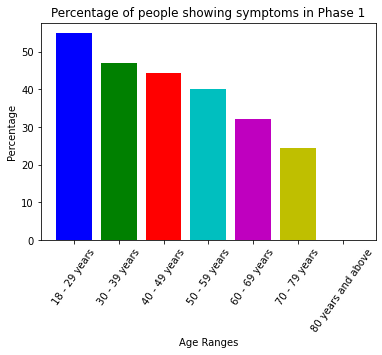

In [69]:
#create bar chart that breaks down by age group

#prepare the data to plot
ages = Phase1_Age['Subgroup']
percent = Phase1_Age['Value']

#create bar chart
plt.bar(ages, percent, color= ('b', 'g', 'r', 'c', 'm', 'y','w'))

#adjust labels
plt.title('Percentage of people showing symptoms in Phase 1')
plt.xlabel('Age Ranges')
plt.xticks(rotation= 55)
plt.ylabel('Percentage')
plt.show()